In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [3]:
ds = pd.read_csv('email.csv')
ds
  

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
# data preprocessing
# remove the unwanted columns

ds = ds.drop(columns=["Email No."])
ds.head()

# gather labels in a sepearate array
labels = ds["Prediction"].values


# # remove labeles from dataset
# ds.drop(columns=["Prediction"])

features = ds.drop(columns=["Prediction"]).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4137, 3000)
(4137,)
(1035, 3000)
(1035,)



=== KNN Performance ===
Accuracy: 0.8628019323671497
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035



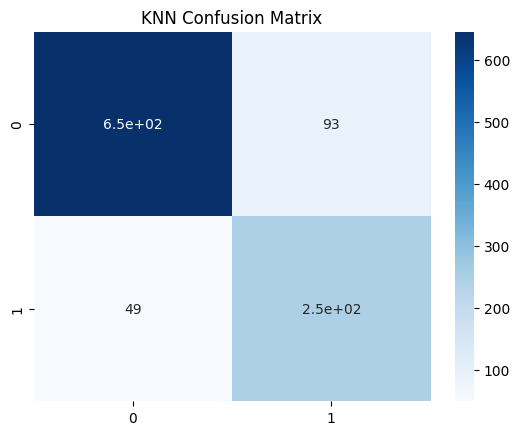

In [6]:
# knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("\n=== KNN Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()


=== SVM Performance ===
Accuracy: 0.9594202898550724
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



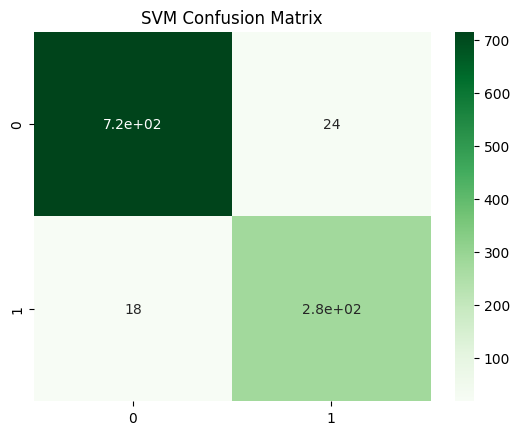

In [7]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n=== SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.show()

In [8]:
knn_acc = accuracy_score(y_test, y_pred_knn)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("\nModel Comparison:")
print(f"KNN Accuracy: {knn_acc:.3f}")
print(f"SVM Accuracy: {svm_acc:.3f}")


Model Comparison:
KNN Accuracy: 0.863
SVM Accuracy: 0.959
